In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pathlib

# Examine ASO (Airborne Snow Lidar)  data for the East River

In [2]:
base = pathlib.Path("/Volumes/Transcend/ASOdata/swe_data/50m_clipped_to_east")
dem_base = pathlib.Path("/Volumes/Transcend/ASOdata/DEMs")

In [76]:
len([x for x in base.glob("*USCOGE*.tif")])

4

In [77]:
dts = ['20180331', '20180524', '20190407', '20190610']

## 1. Open and Plot the East River DEM

In [89]:
east_river_area_m2 = 748983000.0 # m2 ---- COMPUTED ELSEWHERE (but we can double check)

In [78]:
dem = xr.open_rasterio(dem_base.joinpath("3mdem_upsample_50m_clipped_to_east.tif"))

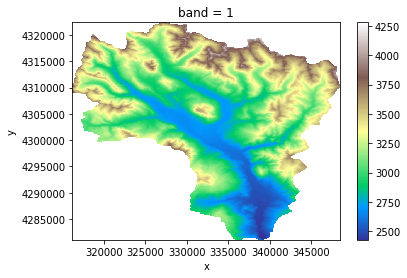

In [103]:
dem.where(dem>0).plot(cmap='terrain')

In [101]:
dem.where(dem>0).shape

(1, 827, 646)

## 2. Open ASO data

In [79]:
time_var = xr.Variable('time', range(4))
ds = xr.concat([xr.open_rasterio(base.joinpath(x)) for x in base.glob("*USCOGE*.tif")], dim=time_var)

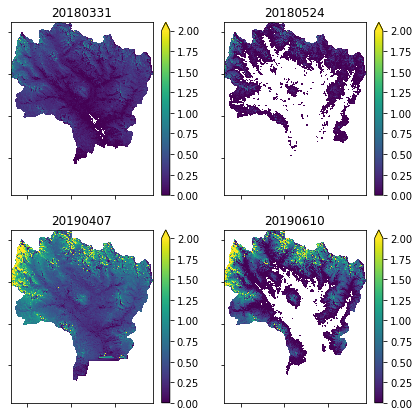

In [104]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches(7,7)
ds.where(ds>0).sel(time=0).plot(ax=ax[0,0], vmin=0, vmax=2)
ds.where(ds>0).sel(time=1).plot(ax=ax[0,1], vmin=0, vmax=2)
ds.where(ds>0).sel(time=2).plot(ax=ax[1,0], vmin=0, vmax=2)
ds.where(ds>0).sel(time=3).plot(ax=ax[1,1], vmin=0, vmax=2)

ax[0,0].set_title(dts[0])
ax[0,1].set_title(dts[1])
ax[1,0].set_title(dts[2])
ax[1,1].set_title(dts[3])


# get rid of the axis text 
for axx in ax.flatten():
    axx.set_xlabel('')
    axx.set_ylabel('')
    axx.set_yticklabels([])
    axx.set_xticklabels([])

    

## 3. Compute the Snow water storage

In [91]:
ssum = [ds.where(ds>0).sel(time=x).sum() for x in range(4)]

In [98]:
(np.array(ssum)*50*50)/east_river_area_m2*1000.

array([211.09047,  45.98248, 573.81995, 281.07144], dtype=float32)

In [97]:
ds.where(ds>0).shape

(4, 1, 827, 646)

In [100]:
np.array(ssum)/(827*646)*1000.

array([118.37569046,  25.78614011, 321.78775021, 157.61975612])